<a href="https://colab.research.google.com/github/lgkartik/mlmadeeasy/blob/master/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading all libraries

In [0]:
import pandas as pd 
import numpy as np                    
import seaborn as sns                  
import matplotlib.pyplot as plt      
%matplotlib inline 
import warnings                        

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train_ctrUa4K.csv to train_ctrUa4K.csv


In [0]:
uploaded = files.upload()

Saving test_lAUu6dG.csv to test_lAUu6dG.csv


In [0]:
train=pd.read_csv("train_ctrUa4K.csv") 
test=pd.read_csv("test_lAUu6dG.csv")

In [0]:
#copy the data for any later uses 
train_original = train
test_original =test

In [0]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [0]:
train.shape,test.shape

((614, 13), (367, 12))

UNIVARIATE ANALYSIS

In [0]:
#TARGET VARIABLE 
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

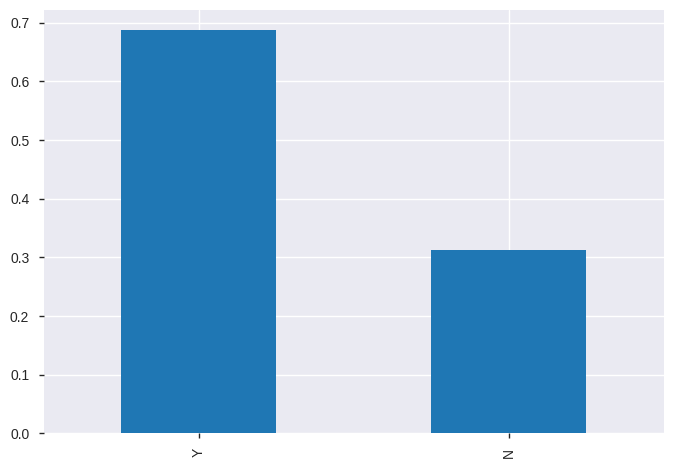

In [0]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

Independent Variable (Categorical)

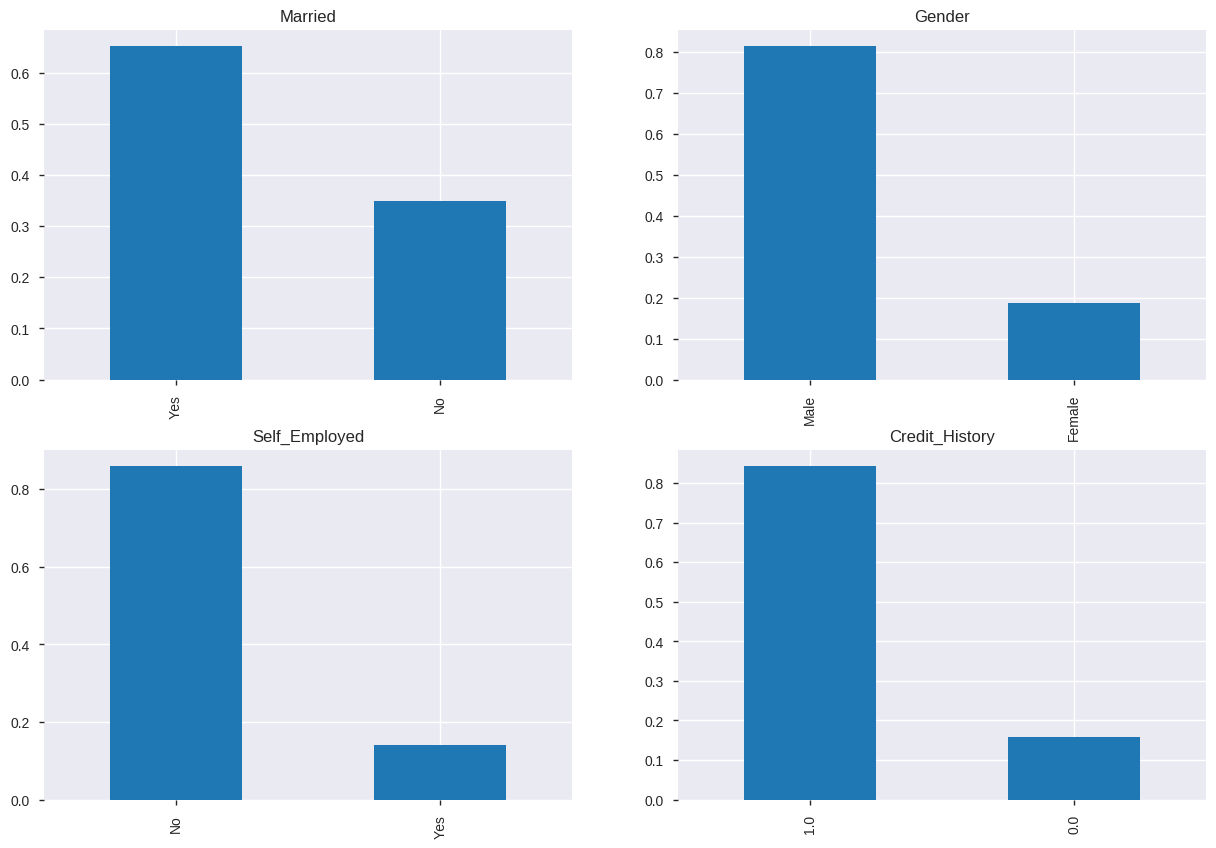

In [0]:
plt.figure(1) 
plt.subplot(221) 
train['Married'].value_counts(normalize=True).plot.bar(figsize=(15,10),title= 'Married') 
plt.subplot(222) 
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be observed from the above plot that
1.   80% applicants in the dataset are male.
2.   Around 65% of the applicants in the dataset are married
3.   Around 15% applicants in the dataset are self employed.
4.   Around 85% applicants have repaid their debts.





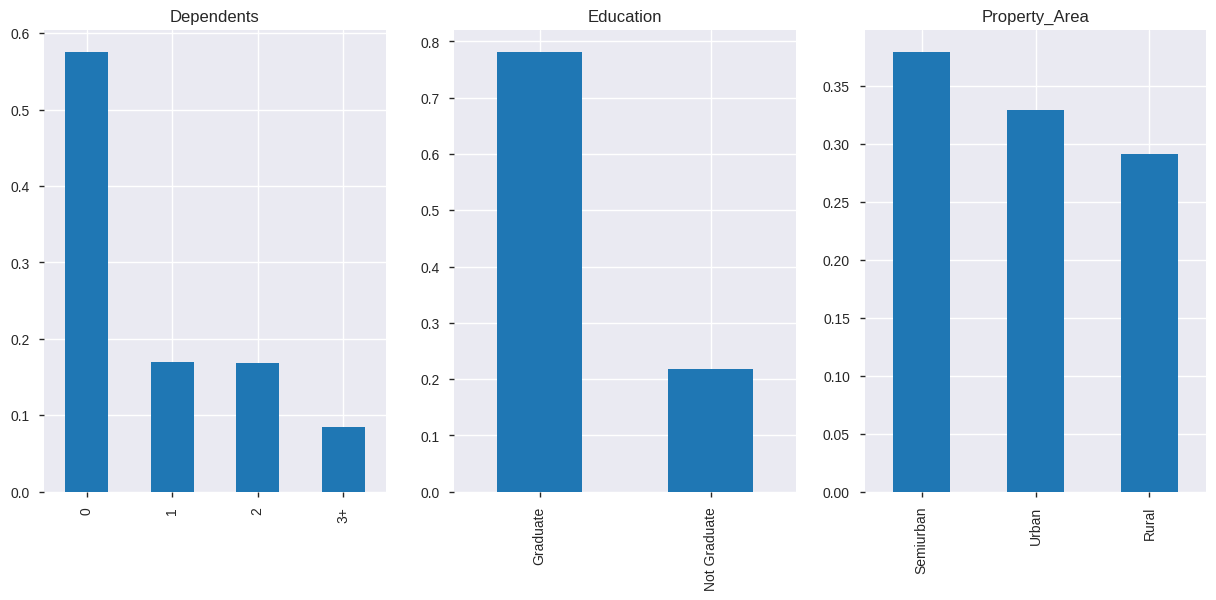

In [0]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:
*  Most of the applicants don’t have any dependents.
*  Around 80% of the applicants are Graduate.
*  Most of the applicants are from Semiurban area.

# **Independent Variable (Numerical)**

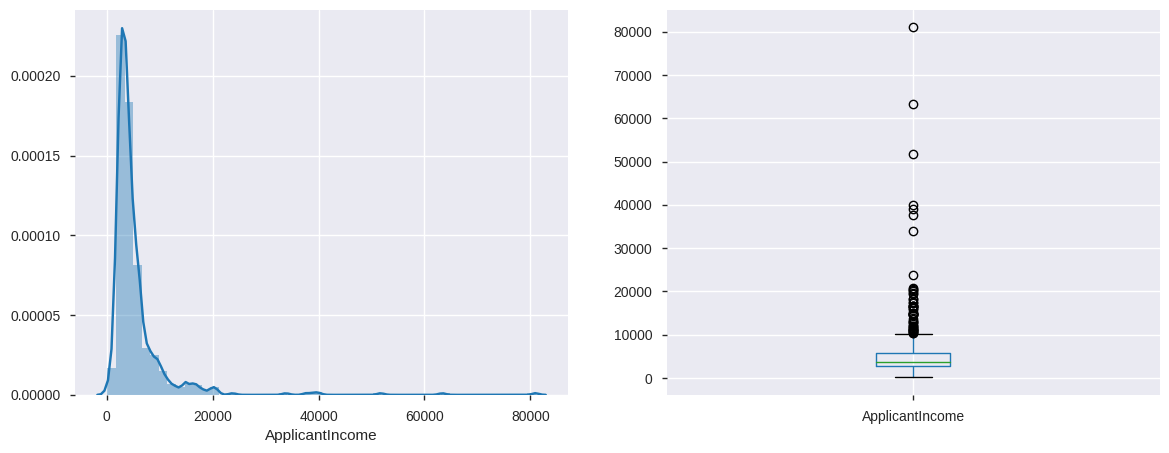

In [0]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(14,5)) 
plt.show()

It can be intefered that most of the data points are located at the left side of the mean location. This tells that the datas are not normally distributed. We would make it normal distributed according to neccesity

Text(0.5, 0.98, '')

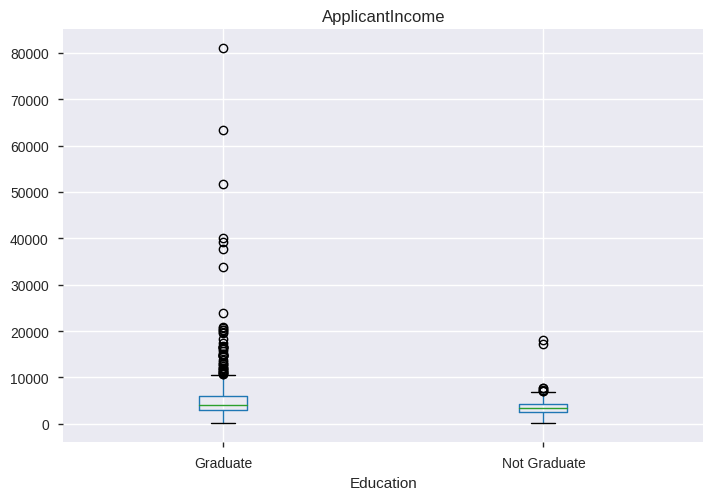

In [0]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")


We can see that the number of grauduates with higher income are more than that of Not Graduates. It seems that they are contributing to outliers number more

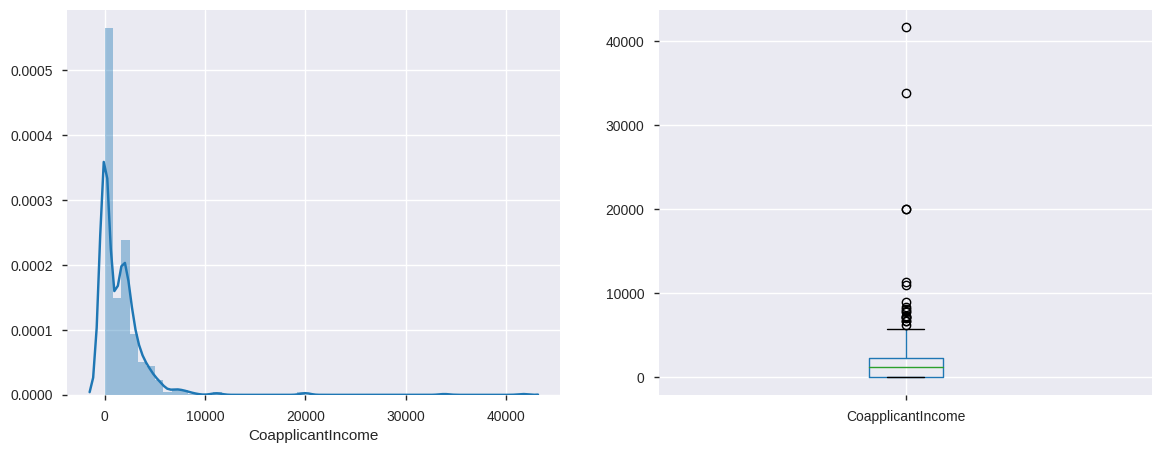

In [0]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

We see a similar distribution as that of the applicant income. Majority of the applicants income range from 0 to 5000. We also see a lot of outliers here and the data is not normally distributed

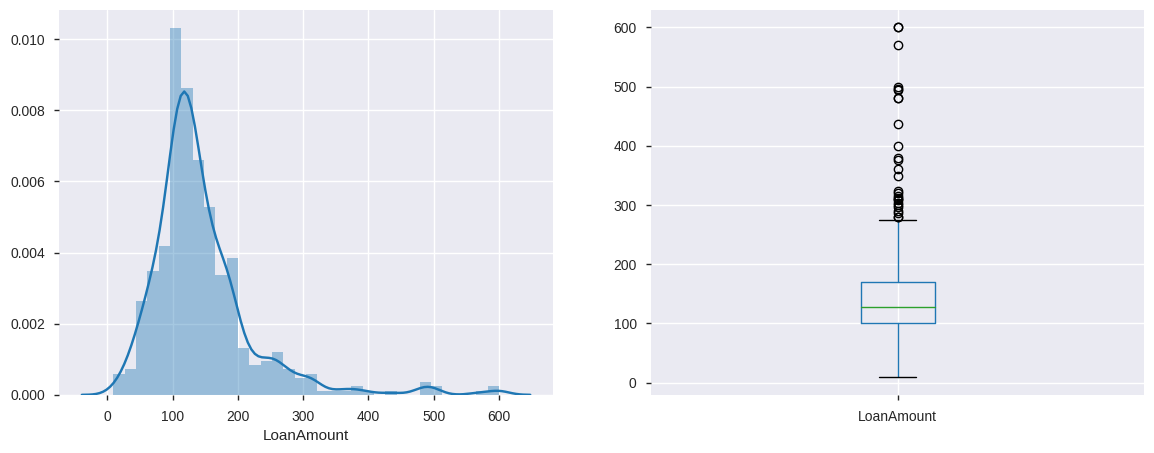

In [0]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(14,5)) 
plt.show()

We can see many outliers are present in the distribution. And the data are fairly normally distributed

## Categorical Independent Variable vs Target Variable

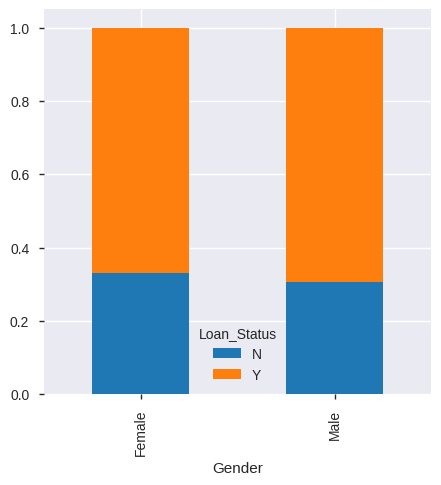

In [0]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))


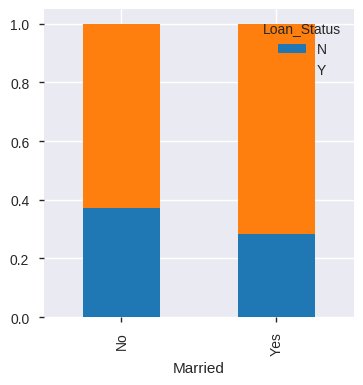

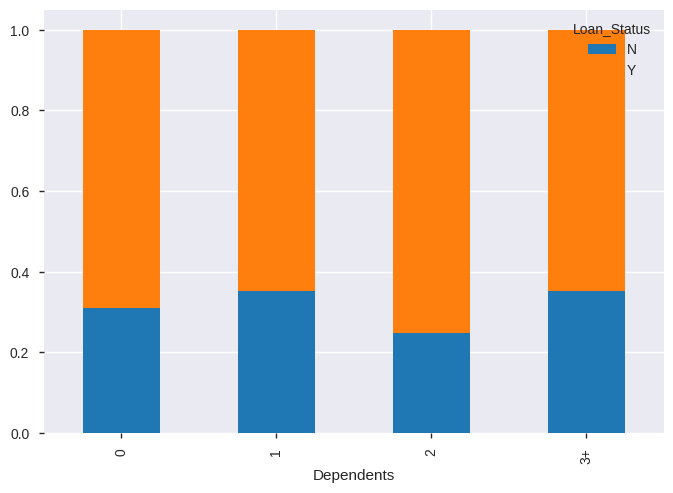

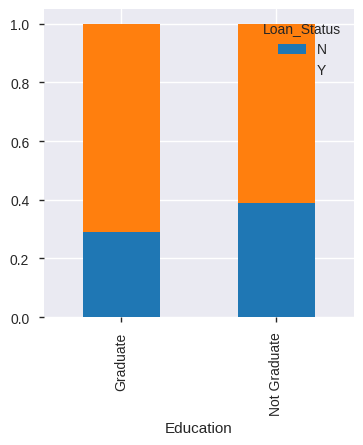

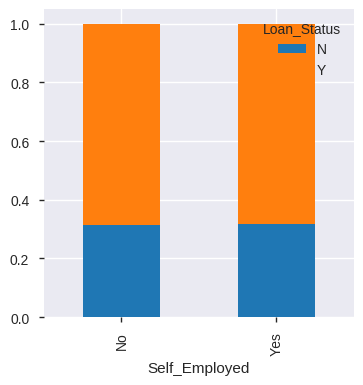

In [0]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

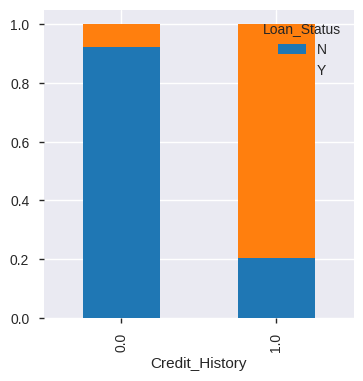

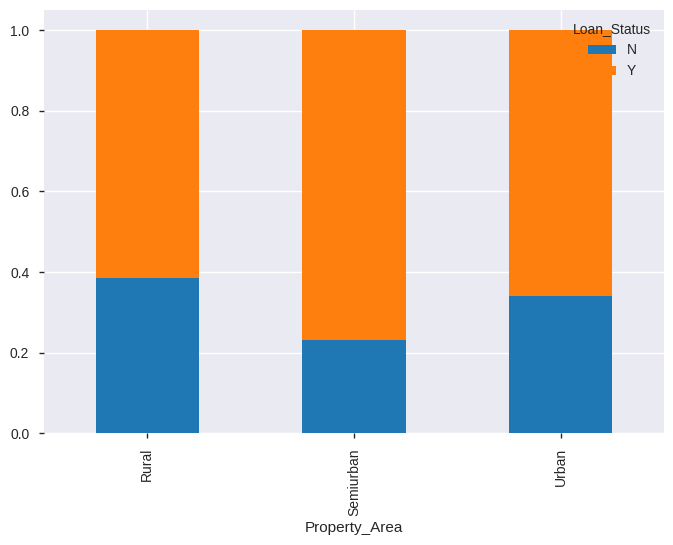

In [0]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

# Numerical Independent Variable vs Target Variable
We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

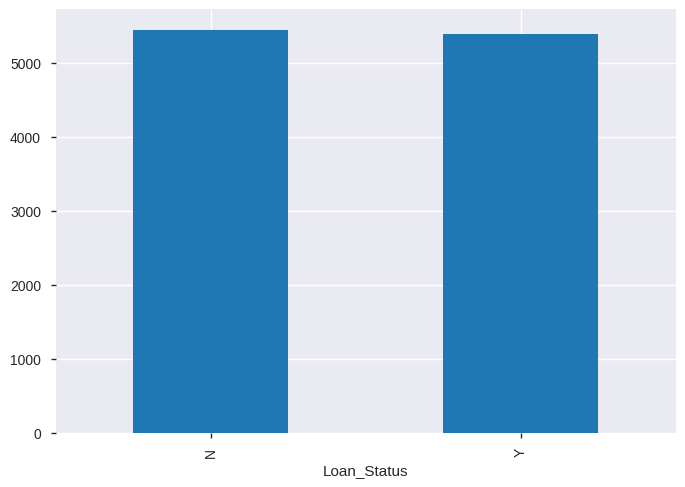

In [0]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [0]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_Bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)

Text(0, 0.5, 'Percentage')

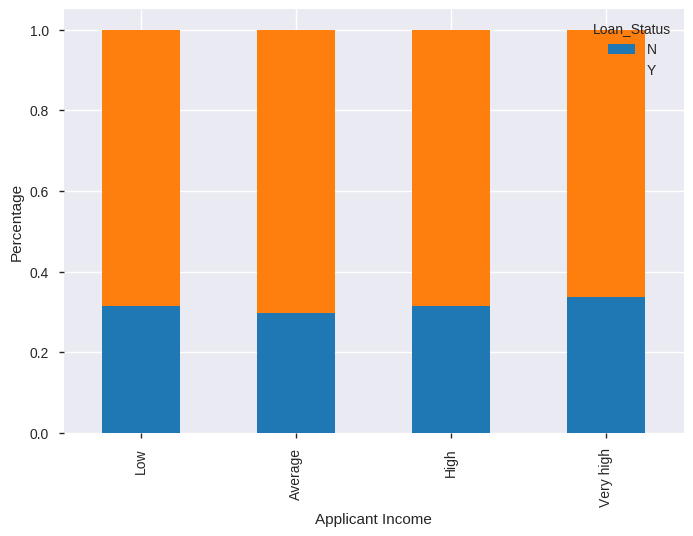

In [0]:
Income_bin = pd.crosstab(train['Income_Bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis =0).plot(kind="bar",stacked=True)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')